50


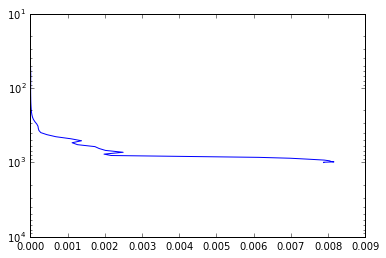

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'

dataset = netCDF4.Dataset(WRFOUT_FILE_PATH, 'r')



# 3D mositure - QVAPOR
# Read the data into a NumPy array
QVAPOR = dataset.variables['QVAPOR']

LAT_INDEX =48 # This is the south_north dimension in the NetCDF file
LON_INDEX=30 # This is the west-east dimension in the NetCDF File

# How many levels are there ? Use the bottom_top dimension
num_levels = dataset.dimensions['bottom_top'].size
print(str(num_levels))

levels = np.arange(num_levels)
# plt.plot(QVAPOR[0,:,LAT_INDEX,LON_INDEX], levels)



# Let's get the P and PB arrays
P = dataset.variables['P'][:] # the perturbation pressure
PB = dataset.variables['PB'][:] # the base state pressure

# Create the total pressure millibar field
P_mb = (P + PB ) * 0.01

# Plot a low level contour for a sanity check
#Try the pressure contours again with more contours
# clevels = np.arange(950.0, 1051.0, 5.0)
# CS = plt.contour(P_mb[0,1, :, :], levels = clevels)
# plt.clabel(CS, inline =True)


#From above, I already have P_mb and QVAPOR, and have defined the 
# point LAT_INDEX and LON_INDEX

#Get the pressure levels for the lat/lon indices
plevels = P_mb[0,:,LAT_INDEX, LON_INDEX]
plt.semilogy(QVAPOR[0,:,LAT_INDEX, LON_INDEX], plevels)
plt.gca().invert_yaxis()



plt.show()
dataset.close()
